In [1]:
from peak_warming_calculator import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt

In [3]:
import time

In [4]:
from varying_g_peak_warming_calculator import *

### MAC curve variables:
- P_50
- s
- P_100

### Economic variables:
- D0
- gamma
- alpha (discount factor)
- g (consumption growth rate)

## Varying MAC curve parameters

In [4]:
# Define the model inputs
problem = {
'num_vars': 3,
'names': ['P_50/P_100', 's', 'P_100'],
'bounds': [[0.4, 0.8],
[0.01, 0.10],
[100, 500]]
}
# Generate samples
param_values = saltelli.sample(problem, 16)

- note: 8 runs -> ~27s
- formula for num. of runs: N(2D+2)
- N=64: 64(2(3)+2) = 3072 runs -> 64*27s ~ 30min

In [5]:
P_100_list = []

for i in range(len(param_values)):
    P_100_list.append(param_values[i][2])

In [6]:
# Y = np.zeros([param_values.shape[0]])

# consumption_growth = 0.020
# consumption_discount = consumption_growth + 0.015

# for i in range(len(param_values)):
#     if i%8 == 0:
#         print(i)
#         t = time.localtime()
#         current_time = time.strftime("%H:%M:%S", t)
#         print(current_time)
        
#     Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=consumption_discount)


In [7]:
def vary_consumption_growth(consumption_growth):
    Y = np.zeros([param_values.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)

        Y[i] = peak_warming_calculator(P_50=param_values[i][0]*param_values[i][2], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=consumption_discount)
        if Y[i] < 1.4:
            print(param_values[i][0])
            print(param_values[i][1])
            print(consumption_discount)
            print(param_values[i][2])
    return Y

In [8]:
consumption_growth_array = np.linspace(0.015, 0.035, 5)

In [9]:
consumption_growth_array

array([0.015, 0.02 , 0.025, 0.03 , 0.035])

In [10]:
# test = vary_consumption_growth(0.02)

In [11]:
# plt.scatter(P_100_list, test, label="0.02")
# plt.scatter(P_100_list, Y_0p02, label="0.02")

In [12]:
Y_array = []

for i in range(len(consumption_growth_array)):
    Y_array.append(vary_consumption_growth(consumption_growth_array[i]))
    

0
14:47:56


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:209: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


MAC curve condition not satisfied


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:206: RuntimeWarning: invalid value encountered in double_scalars
  P_h = P0 + ((P_50 - P0) ** (-s / r) - 2 * (P_100 - P0) ** (-s / r)) ** (-r / s)


0.6625000000000001
0.035312500000000004
0.03
287.5
MAC curve condition not satisfied
0.6625000000000001
0.035312500000000004
0.03
487.5
8
14:48:16
16
14:48:36
MAC curve condition not satisfied
0.7375
0.029687500000000006
0.03
187.5
MAC curve condition not satisfied
0.7625000000000001
0.029687500000000006
0.03
187.5
MAC curve condition not satisfied
0.7375
0.029687500000000006
0.03
187.5
MAC curve condition not satisfied
0.7625000000000001
0.029687500000000006
0.03
187.5
MAC curve condition not satisfied
0.7625000000000001
0.05781250000000001
0.03
187.5
MAC curve condition not satisfied
0.7625000000000001
0.05781250000000001
0.03
187.5
24
14:48:56
MAC curve condition not satisfied
0.5375000000000001
0.012812500000000001
0.03
387.5
MAC curve condition not satisfied
0.5375000000000001
0.012812500000000001
0.03
387.5
MAC curve condition not satisfied
0.5625
0.012812500000000001
0.03
387.5
MAC curve condition not satisfied
0.5625
0.012812500000000001
0.03
387.5
32
14:49:16
MAC curve conditi

MAC curve condition not satisfied
0.7375
0.029687500000000006
0.04
187.5
MAC curve condition not satisfied
0.7625000000000001
0.029687500000000006
0.04
187.5
MAC curve condition not satisfied
0.7375
0.05781250000000001
0.04
187.5
MAC curve condition not satisfied
0.7375
0.029687500000000006
0.04
187.5
MAC curve condition not satisfied
0.7375
0.05781250000000001
0.04
187.5
MAC curve condition not satisfied
0.7625000000000001
0.029687500000000006
0.04
187.5
MAC curve condition not satisfied
0.7625000000000001
0.05781250000000001
0.04
187.5
MAC curve condition not satisfied
0.7625000000000001
0.05781250000000001
0.04
187.5
24
15:00:07
MAC curve condition not satisfied
0.5375000000000001
0.012812500000000001
0.04
387.5
MAC curve condition not satisfied
0.5375000000000001
0.012812500000000001
0.04
387.5
MAC curve condition not satisfied
0.5625
0.012812500000000001
0.04
387.5
MAC curve condition not satisfied
0.5625
0.012812500000000001
0.04
387.5
32
15:00:28
MAC curve condition not satisfie

MAC curve condition not satisfied
0.7625000000000001
0.018437500000000002
0.045
412.5
MAC curve condition not satisfied
0.7625000000000001
0.04656250000000001
0.045
262.5
MAC curve condition not satisfied
0.7625000000000001
0.018437500000000002
0.045
262.5
MAC curve condition not satisfied
0.6375000000000001
0.04656250000000001
0.045
262.5
MAC curve condition not satisfied
0.6375000000000001
0.018437500000000002
0.045
412.5
MAC curve condition not satisfied
0.6375000000000001
0.018437500000000002
0.045
262.5
88
15:08:38
96
15:08:58
MAC curve condition not satisfied
0.5125000000000001
0.035312500000000004
0.045
162.5
MAC curve condition not satisfied
0.5125000000000001
0.035312500000000004
0.045
312.5
MAC curve condition not satisfied
0.48750000000000004
0.035312500000000004
0.045
312.5
104
15:09:19
MAC curve condition not satisfied
0.7125
0.08031250000000001
0.045
362.5
MAC curve condition not satisfied
0.7125
0.029687500000000006
0.045
362.5
MAC curve condition not satisfied
0.7125
0.

Text(0, 0.5, 'Peak Warming')

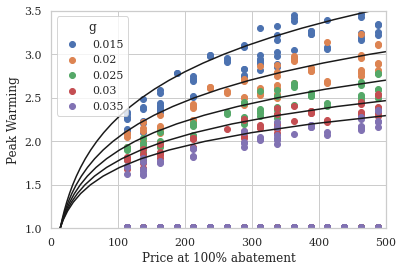

In [29]:
## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i], 3))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.015, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g")
plt.xlim(0, 500)
plt.ylim(1, 3.5)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

In [30]:
# np.savetxt("parameter_sensitivity_runs/Y_array_no_condition", Y_array, delimiter=",")

In [15]:
# np.savetxt("parameter_sensitivity_runs/P_100_16", P_100_list, delimiter=",")

In [16]:
# Si = sobol.analyze(problem, Y_array[0], print_to_console=True)

In [17]:
# plt.title("Total Order Interactions")
# plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
# plt.xticks(rotation=90)

In [18]:
# plt.title("First Order Interactions")
# plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
# plt.xticks(rotation=90)

## Sampling Constraint

In [25]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)

In [26]:
consumption_growth_array

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035])

In [35]:
# Define the model inputs
problem_2 = {
'num_vars': 3,
'names': ['P_50/P_100', 'weak constraint', 'P_100'],
'bounds': [[0.4, 0.8],
[2.1, 3.1],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_2, 16)

In [36]:
P_100_list = []

for i in range(len(param_values_2)):
    P_100_list.append(param_values_2[i][2])

In [37]:
def vary_consumption_growth2(consumption_growth):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][2]
        P_100 = param_values_2[i][2]
        r = consumption_discount
        constraint = param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
        s = r * np.log(constraint)/np.log((P_100)/(P_50))

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=r, return_all_output=True)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        start_year = 1750
        peak_T = Y[i]
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
            print(param_values_2[i][2])
    return Y, SCC_forecasted_0, T_year_list

In [38]:
Y_array = []
SCC_0_array = []
T_year_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0, T_year = vary_consumption_growth2(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)
    T_year_array.append(T_year)

0
11:46:52


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:213: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
11:47:44
16
11:48:33
24
11:49:10
32
11:50:00
40
11:50:52
48
11:51:32
56
11:52:14
64
11:52:55
72
11:53:43
80
11:54:21
88
11:55:08
96
11:55:57
104
11:56:45
112
11:57:27
120
11:58:11
0
11:59:04
8
11:59:44
16
12:00:22
24
12:00:52
32
12:01:30
40
12:02:11
48
12:02:43
56
12:03:18
64
12:03:51
72
12:04:28
80
12:04:55
88
12:05:32
96
12:06:08
104
12:06:40
112
12:07:10
120
12:07:44
0
12:08:27
8
12:08:59
16
12:09:30
24
12:09:56
32
12:10:28
40
12:11:01
48
12:11:29
56
12:11:56
64
12:12:24
72
12:12:55
80
12:13:17
88
12:13:48
96
12:14:19
104
12:14:47
112
12:15:14
120
12:15:43
0
12:16:17
8
12:16:45
16
12:17:11
24
12:17:33
32
12:18:02
40
12:18:30
48
12:18:53
56
12:19:17
64
12:19:41
72
12:20:09
80
12:20:28
88
12:20:55
96
12:21:21
104
12:21:47
112
12:22:09
120
12:22:32
0
12:23:00
8
12:23:24
16
12:23:51
24
12:24:11
32
12:24:36
40
12:25:03
48
12:25:24
56
12:25:44
64
12:26:05
72
12:26:29
80
12:26:47
88
12:27:09
96
12:27:31
104
12:27:51
112
12:28:09
120
12:28:29
0
12:28:52
8
12:29:13
16
12:29:33
24
12:29:49


Text(0, 0.5, 'Peak Warming')

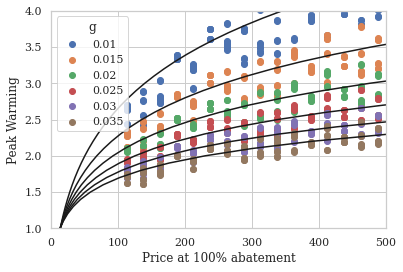

In [39]:
## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i], 3))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1, 5,0.1)
g_bar = np.arange(0.01, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g")
plt.xlim(0, 500)
plt.ylim(1, 4)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

In [49]:
# np.savetxt("parameter_sensitivity_runs/Y_array_condition", Y_array, delimiter=",")

In [52]:
# np.savetxt("parameter_sensitivity_runs/SCC_0_array_condition", SCC_0_array, delimiter=",")

### Plotting MAC curves for above

In [50]:
def abatement(P, P0, P_50=P_50, r=0.04, s=0.05, P_100=P_100):  # 0.05
    if P0 >= P_50:
        print("P0 is greater than P_50")
    elif ((P_100-P0)/(P_50-P0))**(s/r) <= 2:
        print("MAC curve condition not satisfied")
    
    P_h = P0 + ((P_50 - P0) ** (-s / r) - 2 * (P_100 - P0) ** (-s / r)) ** (-r / s)
    Am = 1 + ((P_100 - P0) / (P_h - P0)) ** (-s / r)
    
    A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
    
    return A

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/9752

(20, 1000)

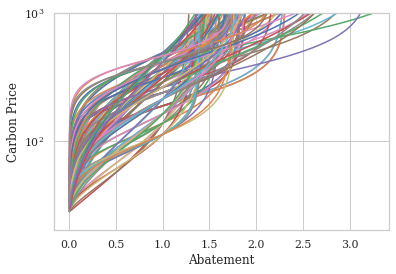

In [153]:
# SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[0]

for i in range(len(param_values_2)):  # 20
    SCC = np.arange(SCC_0_array[0][i], 1000)
    P0 = SCC_25[0]
    P_50 = param_values_2[i][0]*param_values_2[i][2]
    P_100 = param_values_2[i][2]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
    constraint = param_values_2[i][1]
    s = r * np.log(constraint)/np.log((P_100)/(P_50))
#     if constraint >2.5:
#     print(constraint)
    plt.plot(abatement(SCC, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

### Looking at SCC_0

In [119]:
SCC_0_array[0]

array([27.97030615, 30.24752291, 27.87995008, 29.887201  , 29.78392745,
       31.88353463, 30.18704446, 31.82815068, 31.82898748, 30.36429324,
       31.79138608, 30.16688868, 30.12576352, 28.45477684, 30.29801074,
       28.3938868 , 29.12677999, 29.32997537, 29.20372477, 29.12677999,
       29.20372477, 29.32997537, 29.39827736, 29.39827736, 30.26885896,
       30.49790508, 29.94499069, 30.26885896, 29.94499069, 30.49790508,
       30.19174792, 30.19174792, 30.84526973, 30.12980354, 30.87848643,
       30.84526973, 30.87848643, 30.12980354, 30.16892312, 30.16892312,
       30.50033648, 29.97044185, 30.50890496, 30.50033648, 30.50890496,
       29.97044185, 29.98335174, 29.98335174, 30.94637272, 28.22684371,
       31.07170961, 27.26175224, 27.38603771, 24.104112  , 28.46579505,
       24.21709624, 25.20818353, 26.63681004, 25.09873171, 29.3177901 ,
       29.14367185, 30.49753282, 26.5256302 , 30.36735431, 28.43655691,
       31.00392956, 28.74633486, 28.98604686, 29.30688303, 31.46

In [130]:
df = pd.DataFrame(SCC_0_array, index=np.round(consumption_growth_array,3)).transpose()

In [131]:
df

,0.015,0.020,0.025,0.030,0.035
0,27.970306,26.580743,25.437886,24.483751,23.675406
1,30.247523,28.721389,27.444915,26.366967,25.447279
2,27.879950,26.502365,25.368279,24.420888,23.618022
3,29.887201,28.485000,27.288785,26.265498,25.383651
4,29.783927,28.393355,27.206340,26.190439,25.314653
...,...,...,...,...,...
123,29.056956,27.663092,26.491287,25.498343,24.648739
124,29.235431,27.819621,26.631032,25.624850,24.764582
125,32.181671,30.708804,29.415926,28.290030,27.308362
126,32.509075,31.066875,29.784400,28.658818,27.671821


In [148]:
# df.boxplot(whis=100)

Text(0, 0.5, 'Social Cost of Carbon in 2019 ($)')

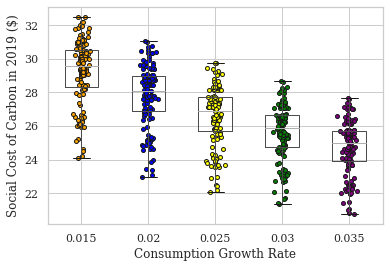

In [150]:
for i,d in enumerate(df):
    y = df[df.columns[i]]
    x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
    plt.plot(x, y, mfc = ["orange","blue","yellow","green","purple"][i], mec='k', ms=4, marker="o", linestyle="None")
    
# plt.boxplot(df, whis=100)
df.boxplot(whis=100)
plt.xlabel("Consumption Growth Rate")
plt.ylabel("Social Cost of Carbon in 2019 ($)")

### Sobol

In [208]:
Y_array_condition = pd.read_csv("parameter_sensitivity_runs/Y_array_condition", header=None).transpose()
SCC_0_array_condition = pd.read_csv("parameter_sensitivity_runs/SCC_0_array_condition", header=None).transpose()

In [209]:
Si = sobol.analyze(problem_2, Y_array_condition[0].to_numpy(), print_to_console=True)

                       ST   ST_conf
P_50/P_100       0.214012  0.165923
weak constraint  0.000534  0.000460
P_100            0.694980  0.431192
                       S1   S1_conf
P_50/P_100       0.496501  0.385751
weak constraint  0.001288  0.018080
P_100            0.663531  0.701580
                                     S2   S2_conf
(P_50/P_100, weak constraint) -0.328011  0.472789
(P_50/P_100, P_100)           -0.554870  0.488693
(weak constraint, P_100)       0.002965  0.025199


In [210]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

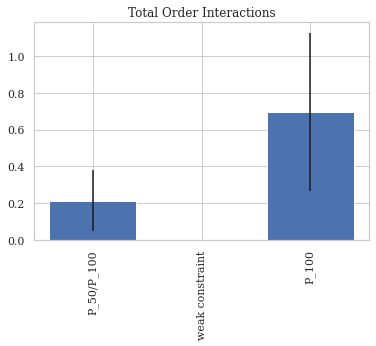

In [211]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

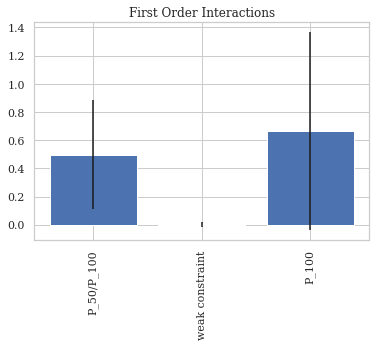

In [212]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [215]:
# Si.plot()

In [223]:
param_values_2 = saltelli.sample(problem_2, 256)

In [224]:
Y, SCC_0 = vary_consumption_growth2(consumption_growth_array[i])

0
22:33:33


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:209: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
22:33:53
16
22:34:16
24
22:34:39
32
22:35:01
40
22:35:27
48
22:35:50
56
22:36:12
64
22:36:34
72
22:36:55
80
22:37:16
88
22:37:36
96
22:37:56
104
22:38:17
112
22:38:37
120
22:38:58
128
22:39:18
136
22:39:39
144
22:39:59
152
22:40:19
160
22:40:40
168
22:41:00
176
22:41:20
184
22:41:41
192
22:42:02
200
22:42:22
208
22:42:42
216
22:43:03
224
22:43:23
232
22:43:44
240
22:44:04
248
22:44:24
256
22:44:44
264
22:45:05
272
22:45:25
280
22:45:46
288
22:46:06
296
22:46:26
304
22:46:47
312
22:47:07
320
22:47:28
328
22:47:48
336
22:48:08
344
22:48:29
352
22:48:49
360
22:49:10
368
22:49:30
376
22:49:51
384
22:50:11
392
22:50:32
400
22:50:52
408
22:51:12
416
22:51:33
424
22:51:53
432
22:52:13
440
22:52:34
448
22:52:54
456
22:53:15
464
22:53:35
472
22:53:55
480
22:54:16
488
22:54:36
496
22:54:56
504
22:55:17
512
22:55:37
520
22:55:58
528
22:56:18
536
22:56:38
544
22:56:59
552
22:57:19
560
22:57:41
568
22:58:01
576
22:58:22
584
22:58:42
592
22:59:03
600
22:59:23
608
22:59:43
616
23:00:04
624
23:00:24

In [235]:
# np.savetxt("parameter_sensitivity_runs/Y_large", Y, delimiter=",")

In [236]:
Si = sobol.analyze(problem_2, Y, print_to_console=True)

                       ST   ST_conf
P_50/P_100       0.194605  0.032522
weak constraint  0.000712  0.000158
P_100            0.804485  0.120848
                       S1   S1_conf
P_50/P_100       0.201905  0.067414
weak constraint  0.000919  0.005039
P_100            0.800980  0.148861
                                     S2   S2_conf
(P_50/P_100, weak constraint) -0.007666  0.090804
(P_50/P_100, P_100)           -0.008267  0.125045
(weak constraint, P_100)      -0.000400  0.008398


In [237]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

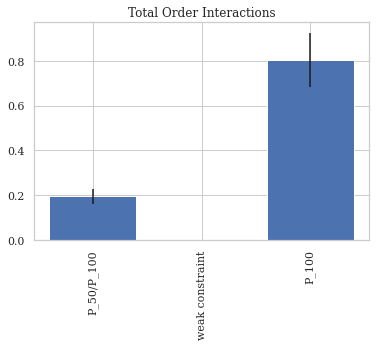

In [238]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

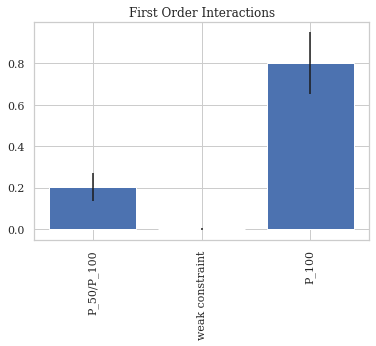

In [239]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

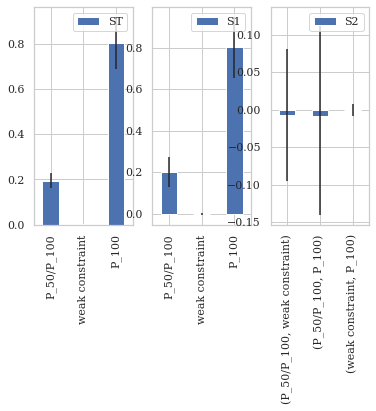

In [233]:
Si.plot()

In [245]:
# Define the model inputs
problem_2 = {
'num_vars': 3,
'names': ['P_50/P_100', 'weak constraint', 'P_100'],
'bounds': [[0.4, 0.8],
[2.1, 1000],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_2, 64)

In [246]:
Y, SCC_0 = vary_consumption_growth2(consumption_growth_array[i])

0
10:36:32


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:209: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
10:36:54
16
10:37:16
24
10:37:37
32
10:37:58
40
10:38:19
48
10:38:40
56
10:39:01
64
10:39:24
72
10:39:46
80
10:40:09
88
10:40:31
96
10:40:55
104
10:41:17
112
10:41:42
120
10:42:07
128
10:42:29
136
10:42:52
144
10:43:15
152
10:43:39
160
10:44:03
168
10:44:26
176
10:44:49
184
10:45:11
192
10:45:34
200
10:45:57
208
10:46:20
216
10:46:44
224
10:47:08
232
10:47:31
240
10:47:54
248
10:48:18
256
10:48:41
264
10:49:04
272
10:49:26
280
10:49:50
288
10:50:13
296
10:50:37
304
10:51:00
312
10:51:23
320
10:51:45
328
10:52:11
336
10:52:34
344
10:52:56
352
10:53:18
360
10:53:40
368
10:54:02
376
10:54:25
384
10:54:48
392
10:55:11
400
10:55:32
408
10:55:53
416
10:56:14
424
10:56:36
432
10:56:57
440
10:57:18
448
10:57:39
456
10:58:00
464
10:58:21
472
10:58:42
480
10:59:03
488
10:59:24
496
10:59:45
504
11:00:06


In [250]:
Si = sobol.analyze(problem_2, Y, print_to_console=True)

                       ST   ST_conf
P_50/P_100       0.170138  0.065587
weak constraint  0.000033  0.000047
P_100            0.832323  0.239548
                       S1   S1_conf
P_50/P_100       0.156320  0.137890
weak constraint  0.000619  0.001803
P_100            0.828913  0.272120
                                     S2   S2_conf
(P_50/P_100, weak constraint)  0.012601  0.187793
(P_50/P_100, P_100)            0.020670  0.261066
(weak constraint, P_100)      -0.000862  0.002612


In [251]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

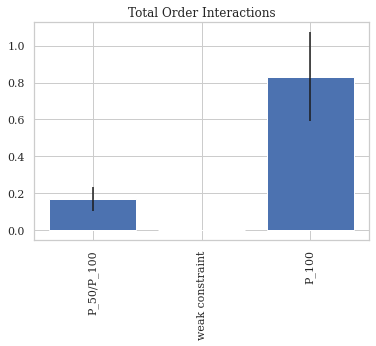

In [252]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

## Sampling s/r

In [154]:
# Define the model inputs
problem_3 = {
'num_vars': 3,
'names': ['P_50/P_100', 's/r', 'P_100'],
'bounds': [[0.3, 0.5],
[1.1, 3.1],
[100, 500]]
}
# Generate samples
param_values_3 = saltelli.sample(problem_3, 16)

In [155]:
def vary_consumption_growth3(consumption_growth):
    Y = np.zeros([param_values_3.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_3.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_3)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_3[i][0]*param_values_3[i][2]
        P_100 = param_values_3[i][2]
        r = consumption_discount
#         constraint = param_values_3[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
        s = r * param_values_3[i][1]

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=r, return_all_output=True)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        if Y[i] < 1.4:
            print(param_values_3[i][0])
            print(param_values_3[i][1])
            print(consumption_discount)
            print(param_values_3[i][2])
    return Y, SCC_forecasted_0

In [156]:
Y_array = []
SCC_0_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0 = vary_consumption_growth3(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)

0
19:04:12


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:209: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
19:04:36
16
19:05:00
24
19:05:23
32
19:05:45
40
19:06:07
48
19:06:27
56
19:06:53
64
19:07:17
72
19:07:39
80
19:08:02
88
19:08:23
96
19:08:45
104
19:09:10
112
19:09:33
120
19:09:57
0
19:10:21
8
19:10:44
16
19:11:08
24
19:11:30
32
19:11:53
40
19:12:14
48
19:12:37
56
19:13:00
64
19:13:23
72
19:13:46
80
19:14:08
88
19:14:30
96
19:14:51
104
19:15:13
112
19:15:37
120
19:16:01
0
19:16:23
8
19:16:48
16
19:17:12
24
19:17:34
32
19:17:56
40
19:18:16
48
19:18:37
56
19:18:57
64
19:19:18
72
19:19:38
80
19:19:59
88
19:20:19
96
19:20:39
104
19:20:59
112
19:21:20
120
19:21:40
0
19:22:00
8
19:22:20
16
19:22:40
24
19:23:01
32
19:23:21
40
19:23:42
48
19:24:03
56
19:24:23
64
19:24:44
72
19:25:05
80
19:25:26
88
19:25:47
96
19:26:08
104
19:26:29
112
19:26:50
120
19:27:11
0
19:27:32
8
19:27:55
16
19:28:18
24
19:28:40
32
19:29:01
40
19:29:21
48
19:29:41
56
19:30:02
64
19:30:22
72
19:30:42
80
19:31:03
88
19:31:23
96
19:31:43
104
19:32:04
112
19:32:24
120
19:32:44


Text(0, 0.5, 'Peak Warming')

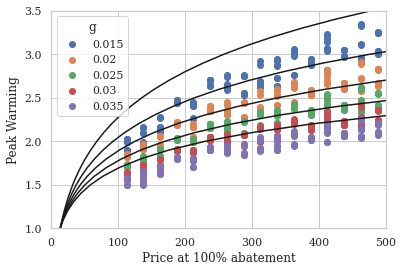

In [165]:
## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i], 3))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.015, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g")
plt.xlim(0, 500)
plt.ylim(1, 3.5)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/975267197.py:10: RuntimeWarning: invalid value encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_84864/97526

(20, 1000)

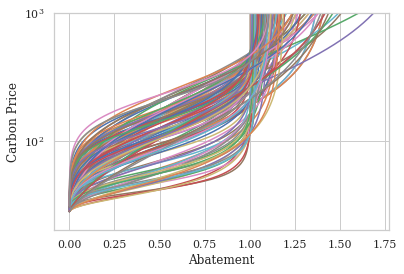

In [158]:
# SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[0]

for i in range(len(param_values_3)):  # 20
    SCC = np.arange(SCC_0_array[0][i], 1000)
    P0 = SCC_25[0]
    P_50 = param_values_3[i][0]*param_values_3[i][2]
    P_100 = param_values_3[i][2]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
#     constraint = param_values_3[i][1]
#     s = r * np.log(constraint)/np.log((P_100)/(P_50))
    s = r * param_values_3[i][1]
#     if constraint >2.5:
#     print(constraint)
    plt.plot(abatement(SCC, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

In [195]:
Si = sobol.analyze(problem_3, Y_array[0], print_to_console=True)

                  ST   ST_conf
P_50/P_100  0.095977  0.068033
s/r         0.001132  0.000963
P_100       0.770306  0.368559
                  S1   S1_conf
P_50/P_100  0.299183  0.228750
s/r        -0.002083  0.024980
P_100       0.748719  0.571424
                           S2   S2_conf
(P_50/P_100, s/r)   -0.233086  0.286337
(P_50/P_100, P_100) -0.398272  0.347291
(s/r, P_100)         0.005451  0.033965


In [196]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

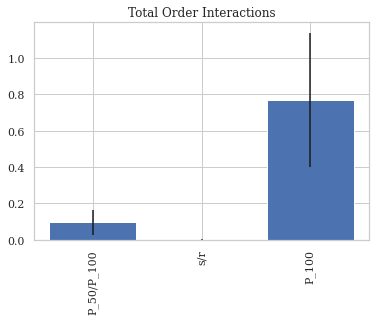

In [197]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

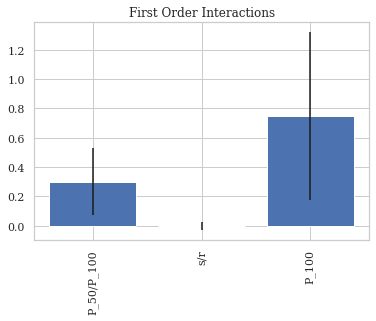

In [198]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [200]:
# Si.plot()

## Look at the Year of Peak Warming

In [262]:
def vary_consumption_growth4(consumption_growth):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][2]
        P_100 = param_values_2[i][2]
        r = consumption_discount
        constraint = param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
        s = r * np.log(constraint)/np.log((P_100)/(P_50))

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=r, return_all_output=True)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        start_year = 1750
        peak_T = Y[i]
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
            print(param_values_2[i][2])
    return Y, SCC_forecasted_0, T_year_list

In [263]:
Y_array = []
SCC_0_array = []
T_year_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0, T_year  = vary_consumption_growth4(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)
    T_year_array.append(T_year)

0
13:25:45
8
13:26:06
16
13:26:27
24
13:26:48
32
13:27:09
40
13:27:30
48
13:27:50
56
13:28:11
64
13:28:32
72
13:28:53
80
13:29:14
88
13:29:35
96
13:29:56
104
13:30:17
112
13:30:38
120
13:30:59
128
13:31:20
136
13:31:40
144
13:32:01
152
13:32:22
160
13:32:43
168
13:33:04
176
13:33:25
184
13:33:46
192
13:34:07
200
13:34:27
208
13:34:48
216
13:35:09
224
13:35:30
232
13:35:51
240
13:36:12
248
13:36:33
256
13:36:53
264
13:37:14
272
13:37:35
280
13:37:56
288
13:38:17
296
13:38:38
304
13:38:58
312
13:39:19
320
13:39:40
328
13:40:01
336
13:40:22
344
13:40:43
352
13:41:04
360
13:41:28
368
13:41:49
376
13:42:18
384
15:07:55
392
15:11:58
400
15:12:55
408
15:33:53
416
15:34:14
424
15:34:38
432
15:35:02
440
15:35:27
448
15:35:51
456
15:36:15
464
15:36:39
472
15:37:02
480
15:37:25
488
15:37:48
496
15:38:11
504
15:38:33
0
15:38:55
8
15:40:28
16
15:40:54
24
15:41:15
32
15:41:36
40
15:41:58
48
15:42:20
56
15:42:43
64
15:43:05
72
15:43:27
80
15:43:50
88
15:44:12
96
15:44:35
104
15:44:59
112
15:45:22
120

In [264]:
df = pd.DataFrame(T_year_array, index=np.round(consumption_growth_array,3)).transpose()

Text(0, 0.5, 'Year of Peak Warming')

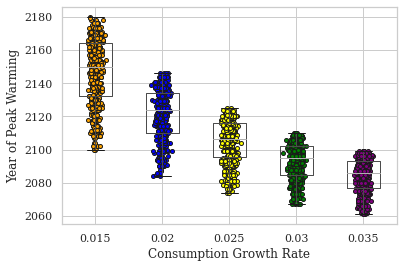

In [265]:
for i,d in enumerate(df):
    y = df[df.columns[i]]
    x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
    plt.plot(x, y, mfc = ["orange","blue","yellow","green","purple"][i], mec='k', ms=4, marker="o", linestyle="None")
    
# plt.boxplot(df, whis=100)
df.boxplot(whis=100)
plt.xlabel("Consumption Growth Rate")
plt.ylabel("Year of Peak Warming")

# Varying g peak temperature calculator

In [17]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)
# consumption_growth_array = np.linspace(0.035, 0.035, 1)

In [18]:
consumption_growth_array

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035])

In [19]:
# # Define the model inputs
# problem_2 = {
# 'num_vars': 3,
# 'names': ['P_50/P_100', 'weak constraint', 'P_100'],
# 'bounds': [[0.5, 0.8],
# [2.1, 3.1],
# [400, 1000]]
# }
# # Generate samples
# param_values_2 = saltelli.sample(problem_2, 2)

In [28]:
# Define the model inputs
problem_3 = {
'num_vars': 2,
'names': ['P_50/P_100', 'P_100'],
'bounds': [[0.5, 0.8],
[500, 1000]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_3, 8)

In [29]:
P_100_list = []

for i in range(len(param_values_2)):
    P_100_list.append(param_values_2[i][1])

In [30]:
# P_100_list

In [31]:
param_values_2[0][1]

734.375

In [32]:
param_values_2[0][1]*param_values_2[0][0]

387.84179687499994

In [33]:
param_values_2.shape[0]

48

In [34]:
def vary_consumption_growth4(consumption_growth):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][1]
        P_100 = param_values_2[i][1]
        r = consumption_discount
        constraint = 2.5  # param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
        s = r * np.log(constraint)/np.log((P_100)/(P_50))
#         g_grad = 0.0001

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = varying_g_peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, g_2019=consumption_growth, consumption_discount=consumption_discount, r=r, return_all_output=True)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        start_year = 1750
        peak_T = Y[i]
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
#             print(param_values_2[i][2])
    return Y, SCC_forecasted_0, T_year_list

In [35]:
Y_array = []
SCC_0_array = []
T_year_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0, T_year = vary_consumption_growth4(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)
    T_year_array.append(T_year)

0
13:32:51
8
13:34:00
16
13:35:28
24
13:36:47
32
13:38:22
40
13:39:45
0
13:41:04
8
13:42:13
16
13:43:31
24
13:44:51
32
13:46:43
40
13:48:10
0
13:49:45
8
13:50:54
16
13:52:09
24
13:53:24
32
13:54:48
40
13:56:04
0
13:57:24
8
13:58:24
16
13:59:27
24
14:00:29
32
14:01:39
40
14:02:44
0
14:03:50
8
14:04:43
16
14:05:39
24
14:06:36
32
14:07:34
40
14:08:27
0
14:09:27
8
14:10:12
16
14:11:00
24
14:11:48
32
14:12:38
40
14:13:26


Text(0, 0.5, 'Peak Warming')

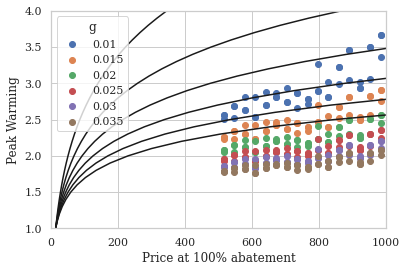

In [36]:
## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i], 3))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1, 5,0.1)
g_bar = consumption_growth_array  # np.arange(0.035, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g")
plt.xlim(0, 1000)
plt.ylim(1, 4)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

In [54]:
# np.savetxt("parameter_sensitivity_runs/Y_array_varying_g", Y_array, delimiter=",")

## restart here

In [5]:
problem_3 = {
'num_vars': 2,
'names': ['P_50/P_100', 'P_100'],
'bounds': [[0.4, 0.8],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_3, 8)

In [6]:
P_100_list = []

for i in range(len(param_values_2)):
    P_100_list.append(param_values_2[i][1])

In [7]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)

In [10]:
def vary_consumption_growth4(consumption_growth):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][1]
        P_100 = param_values_2[i][1]
        r = consumption_discount
        constraint = 2.5  # param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
        s = r * np.log(constraint)/np.log((P_100)/(P_50))
        g_grad = 0.0001
#         if ((P_100 - P0) / (P_50 - P0)) ** (s / r) <= 2:
#             print("MAC curve condition not satisfied")

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = varying_g_peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, g_2019=consumption_growth, consumption_discount=consumption_discount, r=r, return_all_output=True, g_grad=g_grad)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        start_year = 1750
        peak_T = Y[i]
#         print(peak_T)
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
#             print(param_values_2[i][2])
    return Y, SCC_forecasted_0, T_year_list

In [11]:
Y_array = []
SCC_0_array = []
T_year_array = []

for i in range(1):  # len(consumption_growth_array)
    Y, SCC_0, T_year = vary_consumption_growth4(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)
    T_year_array.append(T_year)

0
13:07:48
8
13:09:36
convergence condition not achieved
convergence condition not achieved
convergence condition not achieved
16
13:13:49
24
13:16:02
convergence condition not achieved
convergence condition not achieved
convergence condition not achieved
32
13:19:45
convergence condition not achieved
convergence condition not achieved
40
13:22:34
convergence condition not achieved


Text(0, 0.5, 'Peak Warming')

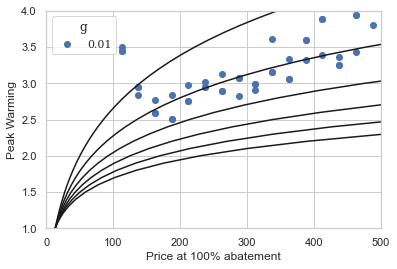

In [12]:
## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i], 3))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1, 5,0.1)
g_bar = consumption_growth_array  # np.arange(0.035, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g")
plt.xlim(0, 500)
plt.ylim(1, 4)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

In [13]:
# param_values_2

In [16]:
for i in range(len(param_values_2)):
    if param_values_2[i][1] == 112.5:
        print(param_values_2[i])
        print(Y_array[0][i])

[  0.6875 112.5   ]
3.4436808434512645
[  0.6875 112.5   ]
3.4436808434512645
[  0.6375 112.5   ]
3.5033064831892866


In [15]:
Y_array


[array([2.82516179, 3.07404897, 3.05702539, 3.05702539, 3.07404897,
        3.33354184, 3.80952601, 4.1278297 , 2.58640546, 2.58640546,
        4.1278297 , 2.77251212, 2.84519011, 2.50789039, 3.94585979,
        3.94585979, 2.50789039, 3.42727728, 3.32090583, 3.60301837,
        2.89886194, 2.89886194, 3.60301837, 3.13481094, 2.84151689,
        2.95510506, 2.759934  , 2.759934  , 2.95510506, 2.97316853,
        3.60762937, 3.16157404, 3.88187992, 3.88187992, 3.16157404,
        3.39394756, 3.02049218, 2.94533795, 3.44368084, 3.44368084,
        2.94533795, 3.50330648, 3.36232205, 3.25699827, 2.99423669,
        2.99423669, 3.25699827, 2.90627789])]

In [72]:
# def vary_consumption_growth2(consumption_growth):
#     Y = np.zeros([param_values_2.shape[0]])

# #     consumption_growth = 0.020
#     consumption_discount = consumption_growth + 0.015

#     for i in range(len(param_values_2)):
#         if i%8 == 0:
#             print(i)
#             t = time.localtime()
#             current_time = time.strftime("%H:%M:%S", t)
#             print(current_time)
        
#         P_50 = param_values_2[i][0]*param_values_2[i][2]
#         P_100 = param_values_2[i][2]
#         r = consumption_discount
#         constraint = param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))

#         Y[i] = peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=r)
#         if Y[i] < 1.4:
#             print(param_values_2[i][0])
#             print(param_values_2[i][1])
#             print(consumption_discount)
#             print(param_values_2[i][2])
#     return Y

In [75]:
Y_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y_array.append(vary_consumption_growth(consumption_growth_array[i]))

0
14:42:42


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:204: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
14:43:04
16
14:43:25
24
14:43:47
32
14:44:09
40
14:44:31
48
14:44:54
56
14:45:20
64
14:45:46
72
14:46:09
80
14:46:31
88
14:46:52
96
14:47:14
104
14:47:36
112
14:48:00
120
14:48:21
0
14:48:42
8
14:49:03
16
14:49:24
24
14:49:45
32
14:50:10
40
14:50:33
48
14:50:55
56
14:51:17
64
14:51:38
72
14:52:00
80
14:52:22
88
14:52:43
96
14:53:06
104
14:53:28
112
14:53:49
120
14:54:12
0
14:54:35
8
14:54:57
16
14:55:19
24
14:55:41
32
14:56:02
40
14:56:23
48
14:56:47
56
14:57:10
64
14:57:31
72
14:57:52
80
14:58:13
88
14:58:35
96
14:58:57
104
15:02:13
112
15:02:35
120
15:02:56
0
15:03:17
8
15:03:38
16
15:03:59
24
15:04:20
32
15:04:41
40
15:05:02
48
15:05:23
56
15:05:45
64
15:06:06
72
15:06:28
80
15:06:49
88
15:07:10
96
15:07:31
104
15:07:52
112
15:08:14
120
15:08:35


Text(0, 0.5, 'Peak Warming')

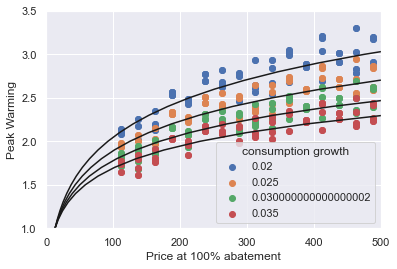

In [89]:
for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=consumption_growth_array[i])

# plt.legend()


# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 3.5)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

In [79]:
# np.savetxt("parameter_sensitivity_runs/Y_array_new_MACC_constraint", Y_array, delimiter=",")

In [85]:
# def abatement6(P, P0, P_50=100, r=0.05, s=0.05, P_100=500):
# #     P_h = P0 +((P_50-P0)**(-s/r)-(P_100-P0)**(-s/r))**(-r/s)
    
# #     Am = 1+((P_100-P0)/(P_h-P0))**(-s/r)
# #     A = Am/(1+((P-P0)/(P_h-P0))**(-s/r))
    
#     P_h = P0 + ((P_50 - P0) ** (-s / r) - 2 * (P_100 - P0) ** (-s / r)) ** (-r / s)
#     Am = 1 + ((P_100 - P0) / (P_h - P0)) ** (-s / r)
    
#     A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
# #     print(Am)
# #     print(P_h)
    
#     return A

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615

(20, 1000)

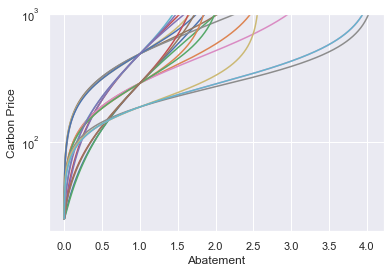

In [95]:
SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[0]

for i in range(20):  # len(param_values_2)
    P0 = SCC_25[0]
    P_50 = param_values_2[i][0]*param_values_2[i][2]
    P_100 = param_values_2[i][2]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
    constraint = param_values_2[i][1]
    s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
    
    plt.plot(abatement6(SCC_25, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC_25)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

In [82]:
consumption_growth_array

array([0.02 , 0.025, 0.03 , 0.035])

In [ ]:
# test, test2 = vary_consumption_growth3(0.01)

In [135]:
# test2

In [136]:
# test

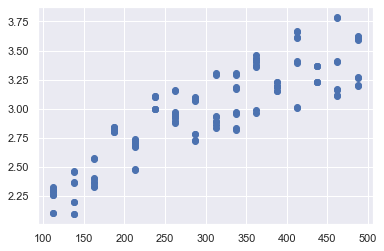

In [139]:
plt.scatter(P_100_list, test, label="0.02")

In [114]:
Y_array = []
SCC_0_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0 = vary_consumption_growth3(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)

0
12:57:16
8
12:57:37
16
12:57:58
24
12:58:20
32
12:58:42
40
12:59:03
48
12:59:25
56
12:59:46
64
13:00:07
72
13:00:29
80
13:00:51
88
13:01:12
96
13:01:34
104
13:01:55
112
13:02:18
120
13:02:45
0
13:03:10
8
13:03:35
16
13:03:59
24
13:04:24
32
13:04:49
40
13:05:13
48
13:05:38
56
13:06:07
64
13:06:33
72
13:06:59
80
13:07:25
88
13:07:51
96
13:08:16
104
13:08:42
112
13:09:08
120
13:09:33
0
13:09:59
8
13:10:25
16
13:10:51
24
13:11:17
32
13:11:43
40
13:12:10
48
13:12:35
56
13:13:00
64
13:13:28
72
13:13:52
80
13:14:18
88
13:14:43
96
13:15:12
104
13:15:36
112
13:15:58
120
13:16:20
0
13:16:42
8
13:17:07
16
13:17:30
24
13:17:52
32
13:18:15
40
13:18:39
48
13:19:03
56
13:19:25
64
13:19:47
72
13:20:10
80
13:20:32
88
13:20:54
96
13:21:16
104
13:21:41
112
13:22:07
120
13:22:32


Text(0, 0.5, 'Peak Warming')

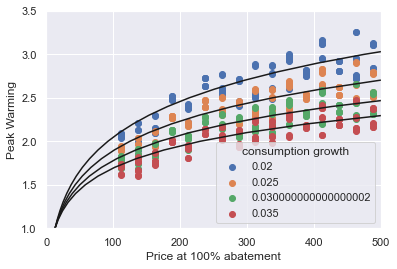

In [116]:
for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=consumption_growth_array[i])

# plt.legend()


# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 3.5)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

In [129]:
SCC_array[0]

array([26.44384419, 28.64608533, 26.36693155, 28.39358126, 28.30192896,
       30.3906826 , 28.58829324, 30.33626646, 30.32808374, 28.84506556,
       30.29081851, 28.56076484, 28.52090117, 26.88876458, 28.78441157,
       26.83471144, 27.49279501, 27.69443535, 27.5681835 , 27.49279501,
       27.5681835 , 27.69443535, 27.76245736, 27.76245736, 28.71133359,
       28.93885705, 28.41564539, 28.71133359, 28.41564539, 28.93885705,
       28.65601755, 28.65601755, 29.32419166, 28.62052698, 29.35511831,
       29.32419166, 29.35511831, 28.62052698, 28.65573652, 28.65573652,
       28.88618332, 28.34712379, 28.89495562, 28.88618332, 28.89495562,
       28.34712379, 28.35984236, 28.35984236, 29.37441541, 26.72719478,
       29.49797935, 25.67008571, 25.79225658, 22.81594232, 26.93324014,
       22.91205934, 23.77461572, 25.07947346, 23.67876265, 27.75144705,
       27.59531481, 28.91459244, 24.97504748, 28.79074358, 26.9153607 ,
       29.42565116, 27.18607597, 27.47178516, 27.75511609, 29.91

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615364.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_63242/74615

(20, 1000)

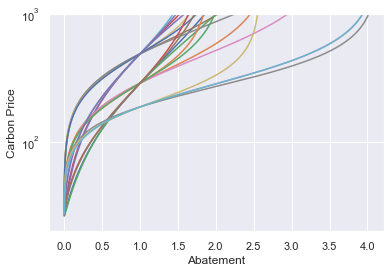

In [134]:
# SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[0]

for i in range(20):  # len(param_values_2)
    SCC_25 = np.arange(SCC_array[0][i], 1000)
    P0 = SCC_25[0]
    P_50 = param_values_2[i][0]*param_values_2[i][2]
    P_100 = param_values_2[i][2]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
    constraint = param_values_2[i][1]
    s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
#     if constraint <2.5:
#     print(constraint)
    plt.plot(abatement6(SCC_25, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC_25)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

In [133]:
P_100

187.5

In [120]:
param_values_2[1]

array([  0.6625 ,   2.56875, 287.5    ])

Text(0.5, 1.0, 'r is discount rate')

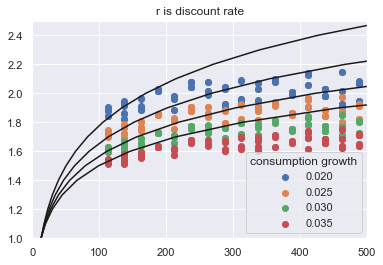

In [89]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[0], label="0.020")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[1], label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[2], label="0.030")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[3], label="0.035")

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)
plt.title("r is discount rate")

## r is fixed

In [58]:
def vary_consumption_growth_r_fixed(consumption_growth):
    Y = np.zeros([param_values.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)

        Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=0.04)
    return Y

In [68]:
Y_array = []

for i in range(len(consumption_growth_array)):
    Y_array.append(vary_consumption_growth_r_fixed(consumption_growth_array[i]))
    

In [62]:
for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=consumption_growth_array[i])

In [49]:
# np.savetxt("parameter_sensitivity_runs/Y_array_r_not_discount", Y_array, delimiter=",")

Text(0.5, 1.0, 'r is not discount rate')

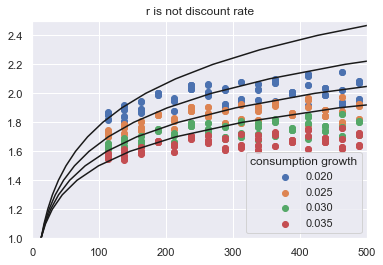

In [90]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[0], label="0.020")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[1], label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[2], label="0.030")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[3], label="0.035")

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)
plt.title("r is not discount rate")

## Comparing the Two

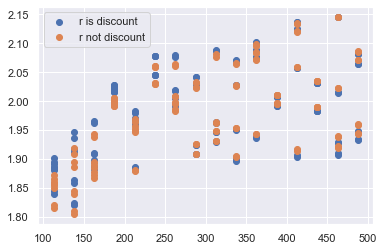

In [53]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[0], label="r is discount")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[0], label="r not discount")

plt.legend()

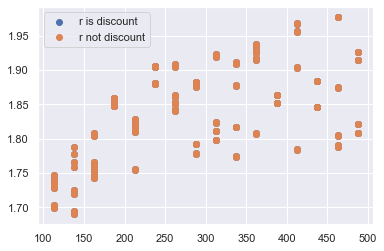

In [72]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[1], label="r is discount")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[1], label="r not discount")

plt.legend()

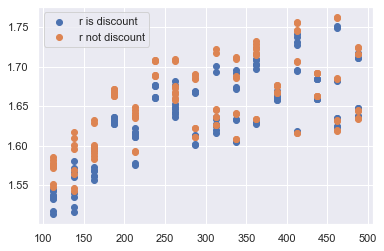

In [54]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_is_discount", header=None).iloc[3], label="r is discount")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_16", header=None), pd.read_csv("parameter_sensitivity_runs/Y_array_r_not_discount", header=None).iloc[3], label="r not discount")

plt.legend()

## Sobol Analysis

In [80]:
# 
Y_data = genfromtxt('parameter_sensitivity_runs/Y_array_r_is_discount', delimiter=',')[0]

# Y_data = genfromtxt("parameter_sensitivity_runs/Y_array_r_is_discount")

In [81]:
Y_data

array([1.90803599, 2.04194324, 1.90836661, 1.93254789, 1.93406119,
       2.08105255, 2.04117531, 2.0818034 , 2.06394488, 1.94719948,
       2.06485917, 2.03026176, 2.02981318, 1.92418233, 1.94862629,
       1.92450928, 2.01503292, 2.02430147, 2.0192397 , 2.01503292,
       2.0192397 , 2.02430147, 2.02871005, 2.02871005, 1.99126619,
       2.00722941, 1.99366389, 1.99126619, 1.99366389, 2.00722941,
       2.00925073, 2.00925073, 2.03179035, 1.98383717, 2.03155319,
       2.03179035, 2.03155319, 1.98383717, 1.9834997 , 1.9834997 ,
       2.07749864, 2.04513694, 2.07811913, 2.07749864, 2.07811913,
       2.04513694, 2.04563847, 2.04563847, 2.06943913, 1.89967187,
       2.07031131, 1.93694011, 1.94600053, 1.82010665, 1.89709628,
       1.82474105, 1.86341896, 1.91776832, 1.85876599, 1.95048138,
       1.95180114, 2.02863301, 1.91155206, 2.02871636, 1.93094804,
       2.08614038, 1.92927786, 1.93977114, 1.93678807, 2.10078389,
       2.08908295, 2.10203302, 1.88642733, 1.84528101, 1.88075

In [82]:
Si = sobol.analyze(problem, Y_data, print_to_console=True)

             ST   ST_conf
P_h    0.760404  0.467402
s      0.000564  0.000380
P_100  0.377137  0.329560
             S1   S1_conf
P_h    1.051108  0.652675
s     -0.003719  0.015351
P_100  0.344316  0.474884
                    S2   S2_conf
(P_h, s)     -0.361455  0.511555
(P_h, P_100) -0.607737  0.607065
(s, P_100)   -0.002870  0.030904


In [84]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

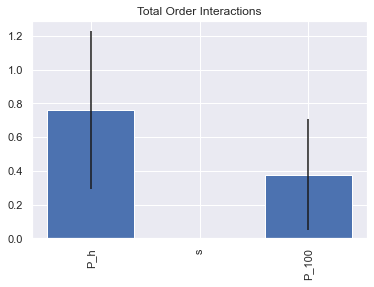

In [86]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

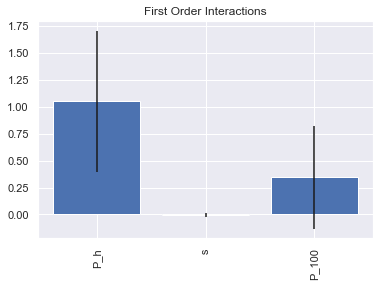

In [87]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [83]:
# Y_array

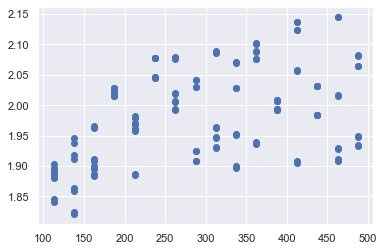

In [10]:
plt.scatter(P_100_list, Y_0p02, label="0.02")

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

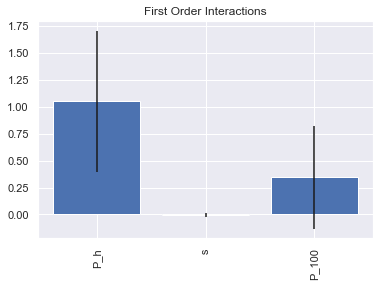

In [85]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [32]:
# np.savetxt("parameter_sensitivity_runs/sd", Y, delimiter=",")

In [33]:
P_100_list = []

for i in range(len(param_values)):
    P_100_list.append(param_values[i][2])


In [34]:
# np.savetxt("P_100_64", P_100_list, delimiter=",")

In [35]:
# Y_file = pd.read_csv("0p02_64", header=None)
# plt.scatter(P_100_list, Y_file)
# Y_file = pd.read_csv("0p025_64", header=None)
# plt.scatter(P_100_list, Y_file)
# Y_file = pd.read_csv("0p03_64", header=None)
# plt.scatter(P_100_list, Y_file)
# Y_file = pd.read_csv("0p035_64", header=None)
# plt.scatter(P_100_list, Y_file)

(1.0, 2.5)

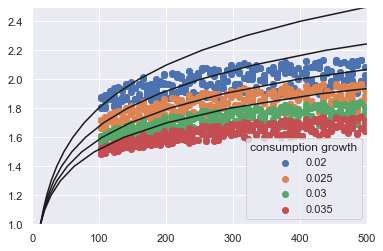

In [64]:
W0 = 75*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]


plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64", header=None), label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64", header=None), label="0.03")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64", header=None), label="0.035")

plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)

(1.0, 2.5)

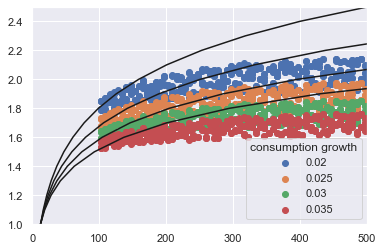

In [65]:
W0 = 75*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.5*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.02, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]


plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64_fixed_r", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64_fixed_r", header=None), label="0.025")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64_fixed_r", header=None), label="0.03")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64_fixed_r", header=None), label="0.035")
# plt.scatter(pd.read_csv("P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64", header=None), label="0.035")


plt.legend(title="consumption growth")
plt.xlim(0, 500)
plt.ylim(1, 2.5)

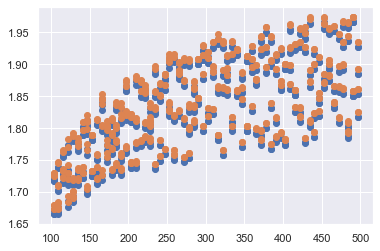

In [67]:
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64_fixed_r", header=None), label="0.02")


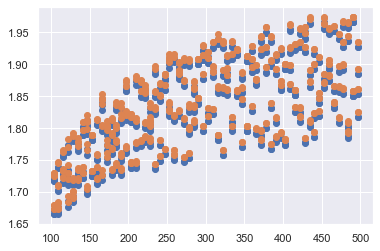

In [76]:
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64", header=None), label="0.025")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64", header=None), label="0.03")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64", header=None), label="0.035")


# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p020_64_fixed_r", header=None), label="0.02")
plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p025_64_fixed_r", header=None), label="0.025")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p030_64_fixed_r", header=None), label="0.03")
# plt.scatter(pd.read_csv("parameter_sensitivity_runs/P_100_64", header=None), pd.read_csv("parameter_sensitivity_runs/0p035_64_fixed_r", header=None), label="0.035")

In [60]:
Y_data = genfromtxt('parameter_sensitivity_runs/0p020_64_fixed_r', delimiter=',')

In [61]:
Si = sobol.analyze(problem, Y_data, print_to_console=True)

             ST   ST_conf
P_h    0.487470  0.189721
s      0.001107  0.000882
P_100  0.520983  0.164944
             S1   S1_conf
P_h    0.411951  0.234609
s     -0.001460  0.012534
P_100  0.528034  0.217213
                    S2   S2_conf
(P_h, s)      0.036045  0.301888
(P_h, P_100)  0.028703  0.340543
(s, P_100)    0.002415  0.017980


In [62]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

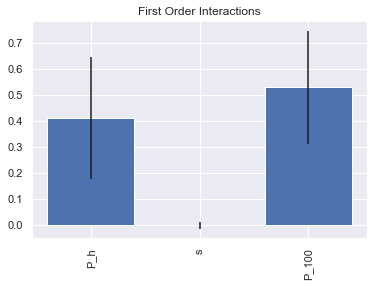

In [63]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

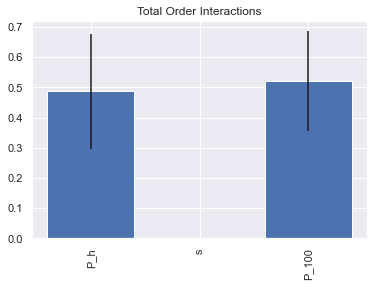

In [64]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

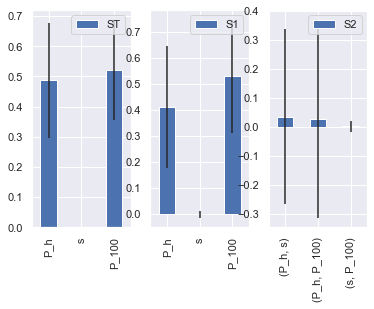

In [65]:
Si.plot()

In [ ]:
# Define the model inputs
problem = {
'num_vars': 3,
'names': ['P_50', 's', 'P_100'],
'bounds': [[50, 75],
[0.055, 0.06],
[100, 500]]
}
# Generate samples
param_values = saltelli.sample(problem, 8)

In [ ]:
Y = np.zeros([param_values.shape[0]])

consumption_growth = 0.015
consumption_discount = consumption_growth + 0.015

for i in range(len(param_values)):
    if i%8 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
        
    Y[i] = peak_warming_calculator(P_50=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=consumption_discount)


In [61]:
def function(consumption_growth):
    Y = np.zeros([param_values.shape[0]])

    growth_adjusted_discount_function = consumption_growth + 0.015

    for i in range(len(param_values)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)

        Y[i] = peak_warming_calculator(P_50=param_values[i][0], s=param_values[i][1], P_100=param_values[i][2], consumption_growth=consumption_growth, consumption_discount=growth_adjusted_discount_function)
    
#     filename = "Y_0p" + str(consumption_growth)[-2:]
#     np.savetxt(filename, Y, delimiter=",")
    
    plt.scatter(P_100_list, Y)

0
14:25:59
8
14:26:25
16
14:26:53
24
14:27:20
32
14:27:48
40
14:28:15
48
14:28:43
56
14:29:09


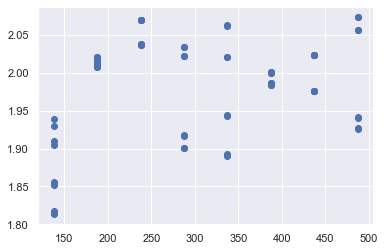

In [62]:
# function(consumption_growth=0.015)
function(consumption_growth=0.02)
# function(consumption_growth=0.025)
# function(consumption_growth=0.03)
# function(consumption_growth=0.035)

In [63]:
Y_0p02 = pd.read_csv("Y_0p25", header=None)

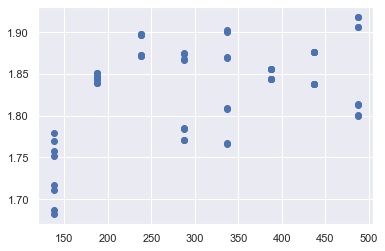

In [64]:
plt.scatter(P_100_list, Y_0p02)

In [54]:
# Define the model inputs
problem = {
'num_vars': 3,
'names': ['P_50', 's', 'P_100'],
'bounds': [[50, 75],
[0.055, 0.06],
[100, 500]]
}
# Generate samples
param_values = saltelli.sample(problem, 64)

0
13:30:04


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:206: RuntimeWarning: divide by zero encountered in power
  A = Am/(1 + ((P - P0)/(P_50 - P0))**(-s/r))


8
13:30:31
16
13:30:59
24
13:31:29
32
13:31:57
40
13:32:23
48
13:32:49
56
13:33:16
64
13:33:42
72
13:34:08
80
13:34:35
88
13:35:01
96
13:35:28
104
13:35:59
112
13:36:28
120
13:36:57
128
13:37:23
136
13:37:50
144
13:38:16
152
13:38:45
160
13:39:12
168
13:39:38
176
13:40:05
184
13:40:31
192
13:40:57
200
13:41:24
208
13:41:50
216
13:42:16
224
13:42:42
232
13:43:08
240
13:43:35
248
13:44:03
256
13:44:29
264
13:44:56
272
13:45:22
280
13:45:48
288
13:46:15
296
13:46:41
304
13:47:07
312
13:47:33
320
13:48:00
328
13:48:27
336
13:48:53
344
13:49:19
352
13:49:46
360
13:50:13
368
13:50:39
376
13:51:07
384
13:51:37
392
13:52:05
400
13:52:32
408
13:52:59
416
13:53:26
424
13:53:54
432
13:54:21
440
13:54:49
448
13:55:17
456
13:55:46
464
13:56:15
472
13:56:42
480
13:57:11
488
13:57:39
496
13:58:07
504
13:58:36


ValueError: x and y must be the same size

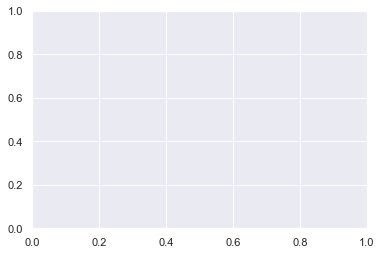

In [55]:
function(consumption_growth=0.02)

In [ ]:
Si = sobol.analyze(problem, Y, print_to_console=True)

## Parameters other than Discount Factor & Consumption Growth Rate

In [25]:
# Define the model inputs
problem = {
'num_vars': 5,
'names': ['P_h', 's', 'Am', 'D0', 'gamma'],
'bounds': [[50, 100],
[15, 25],
[1.05, 1.5],
[0.002, 0.003],
[2, 2.5]]
}
# Generate samples
param_values = saltelli.sample(problem, 256)

In [26]:
len(param_values)

3072

- note: 8 runs -> ~27s
- formula for num. of runs: N(2D+2)
- N=256: 256(2(5)+2) = 3072 runs -> 384*22s ~ 170min

In [89]:
param_values

array([[5.02929688e+01, 1.99804688e+01, 1.35498047e+00, 2.29492188e-03,
        2.38964844e+00],
       [5.53710938e+01, 1.99804688e+01, 1.35498047e+00, 2.29492188e-03,
        2.38964844e+00],
       [5.02929688e+01, 1.86523438e+01, 1.35498047e+00, 2.29492188e-03,
        2.38964844e+00],
       ...,
       [9.38476562e+01, 2.24414062e+01, 1.25830078e+00, 2.84570313e-03,
        2.10058594e+00],
       [9.38476562e+01, 2.24414062e+01, 1.25830078e+00, 2.22070313e-03,
        2.17675781e+00],
       [9.38476562e+01, 2.24414062e+01, 1.25830078e+00, 2.22070313e-03,
        2.10058594e+00]])

In [61]:
np.savetxt("param_values.csv", param_values, delimiter=",")

In [27]:
Y = np.zeros([param_values.shape[0]])

for i in range(len(param_values)):
    if i%64 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
        
    Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], Am=param_values[i][2], D0=param_values[i][3], gamma=param_values[i][4])

0
15:20:56
64
15:24:32
128
15:28:01
192
15:31:35
256
15:35:04
320
15:38:34
384
15:42:05
448
15:45:38
512
15:49:12
576
15:52:46
640
15:56:23
704
15:59:59
768
16:03:35
832
16:07:11
896
16:10:47
960
16:14:26
1024
16:18:03
1088
16:21:39
1152
16:25:10
1216
16:28:38
1280
16:32:07
1344
16:35:35
1408
16:39:04
1472
16:42:32
1536
16:46:01
1600
16:49:29
1664
16:52:58
1728
16:56:26
1792
16:59:55
1856
17:03:24
1920
17:06:52
1984
17:10:21
2048
17:13:50
2112
17:17:19
2176
17:20:49
2240
17:24:18
2304
17:27:46
2368
17:31:15
2432
17:34:43
2496
17:38:12
2560
17:41:40
2624
17:45:08
2688
17:48:38
2752
17:52:07
2816
17:55:35
2880
17:59:04
2944
18:02:32
3008
18:06:01


In [63]:
np.savetxt("Y.csv", Y, delimiter=",")

In [64]:
Si = sobol.analyze(problem, Y, print_to_console=True)

             ST   ST_conf
P_h    0.241163  0.049401
s      0.026334  0.012869
Am     0.473002  0.092153
D0     0.084143  0.019034
gamma  0.174514  0.046489
             S1   S1_conf
P_h    0.248344  0.077551
s      0.015194  0.027129
Am     0.466365  0.108846
D0     0.080376  0.045775
gamma  0.167650  0.069637
                    S2   S2_conf
(P_h, s)     -0.016111  0.098991
(P_h, Am)    -0.021075  0.145442
(P_h, D0)    -0.013766  0.104831
(P_h, gamma) -0.000502  0.113335
(s, Am)       0.014273  0.052010
(s, D0)       0.012359  0.039592
(s, gamma)    0.003550  0.037917
(Am, D0)      0.006379  0.161615
(Am, gamma)   0.003951  0.155872
(D0, gamma)   0.008522  0.081096


In [70]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

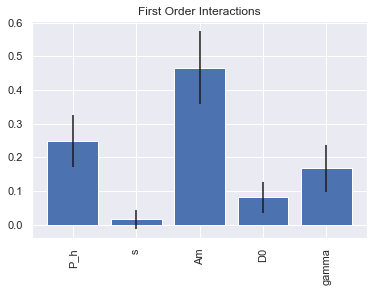

In [71]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

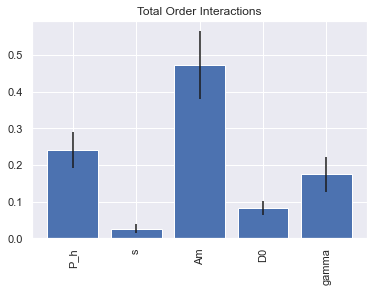

In [88]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

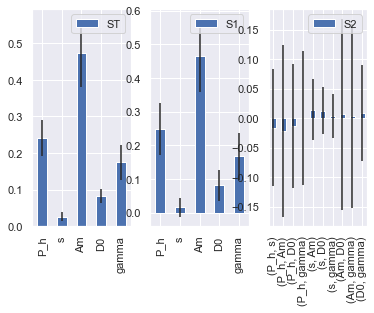

In [76]:
Si.plot()

## All Parameters

In [87]:
# Define the model inputs
problem = {
'num_vars': 7,
'names': ['P_h', 's', 'Am', 'D0', 'gamma', 'discount factor', 'consumption growth'],
'bounds': [[50, 100],
[15, 25],
[1.05, 1.5],
[0.002, 0.003],
[2, 2.5],
[0.02, 0.07],
[0.02, 0.04]]
}
# Generate samples
param_values = saltelli.sample(problem, 128)

In [88]:
len(param_values)

2048

- note: 8 runs -> ~22s
- formula for num. of runs: N(2D+2)
- N=8: 8(2(7)+2) = 128 runs -> 16*22s ~ 6min
- N=64: 64(2(7)+2) = 1024 runs -> 128*22s ~ 47min
- N=128: 128(2(7)+2) = 2048 runs -> 256*22s ~ 94min

In [90]:
Y = np.zeros([param_values.shape[0]])



for i in range(len(param_values)):
    if i%8 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
        
    Y[i] = peak_warming_calculator(P_h=param_values[i][0], s=param_values[i][1], Am=param_values[i][2], D0=param_values[i][3], gamma=param_values[i][4], consumption_discount=param_values[i][5], consumption_growth=param_values[i][6])

0
12:07:48


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:198: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


8
12:08:09
16
12:08:34
24
12:09:02
32
12:09:28
40
12:09:56
48
12:10:24
56
12:10:51
64
12:11:18
72
12:11:45
80
12:12:11
88
12:12:38
96
12:13:04
104
12:13:31
112
12:13:58
120
12:14:25
128
12:14:52
136
12:15:20
144
12:15:47
152
12:16:11
160
12:16:37
168
12:17:03
176
12:17:30
184
12:17:59
192
12:18:26
200
12:18:50
208
12:19:12
216
12:19:34
224
12:20:02
232
12:20:23
240
12:20:44
248
12:21:04
256
12:21:29
264
12:21:50
272
12:22:13
280
12:22:41
288
12:23:03
296
12:23:27
304
12:23:51
312
12:24:14
320
12:24:36
328
12:24:56
336
12:25:18
344
12:25:40
352
12:26:00
360
12:26:20
368
12:26:41
376
12:27:02
384
12:27:27
392
12:27:53
400
12:28:20
408
12:28:47
416
12:29:16
424
12:29:43
432
12:30:09
440
12:30:35
448
12:31:01
456
12:31:28
464
12:31:52
472
12:32:13
480
12:32:34
488
12:32:56
496
12:33:19
504
12:33:46
512
12:34:11
520
12:34:31
528
12:34:51
536
12:35:12
544
12:35:35
552
12:36:02
560
12:36:27
568
12:36:51
576
12:37:15
584
12:37:41
592
12:38:06
600
12:38:30
608
12:38:53
616
12:39:17
624
12:39:40

In [91]:
Si = sobol.analyze(problem, Y, print_to_console=True)

                          ST   ST_conf
P_h                 0.020594  0.006929
s                   0.002045  0.002329
Am                  0.036427  0.013375
D0                  0.007316  0.002406
gamma               0.016898  0.007042
discount factor     0.615299  0.160227
consumption growth  0.312551  0.087787
                          S1   S1_conf
P_h                 0.026586  0.031882
s                   0.001747  0.008309
Am                  0.017925  0.041090
D0                  0.012649  0.021208
gamma               0.012763  0.025650
discount factor     0.642608  0.199407
consumption growth  0.281530  0.125541
                                             S2   S2_conf
(P_h, s)                              -0.019404  0.054018
(P_h, Am)                             -0.020598  0.054947
(P_h, D0)                             -0.016672  0.053619
(P_h, gamma)                          -0.017117  0.052921
(P_h, discount factor)                -0.022259  0.063907
(P_h, consumption growth)   

In [92]:
total_Si, first_Si, second_Si = Si.to_df()

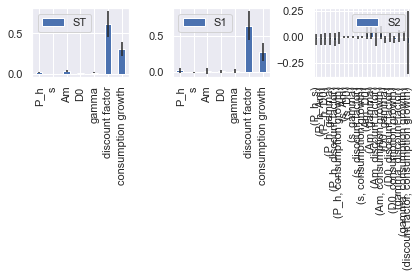

In [93]:
Si.plot()
plt.tight_layout()

In [94]:
total_Si

,ST,ST_conf
P_h,0.020594,0.006929
s,0.002045,0.002329
Am,0.036427,0.013375
D0,0.007316,0.002406
gamma,0.016898,0.007042
discount factor,0.615299,0.160227
consumption growth,0.312551,0.087787


In [95]:
total_Si.index

Index(['P_h', 's', 'Am', 'D0', 'gamma', 'discount factor',
       'consumption growth'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

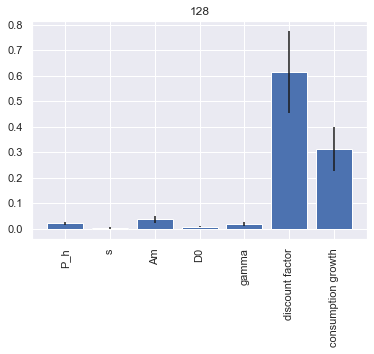

In [98]:
plt.title("128")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

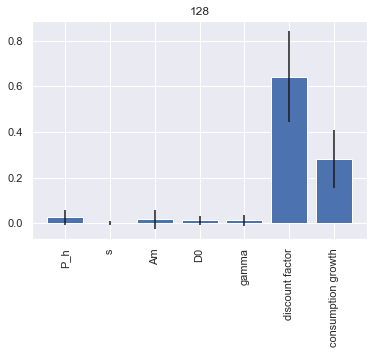

In [99]:
plt.title("128")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

In [22]:
Si

{'S1': array([ 0.0008269 , -0.01496745,  0.18418246,  0.00639928, -0.01174437,
         0.55496678,  0.77910727]),
 'S1_conf': array([0.17111052, 0.03665097, 0.28509729, 0.12564102, 0.05360042,
        0.80816551, 0.72242255]),
 'ST': array([0.02368216, 0.00094096, 0.05846661, 0.00803795, 0.00174271,
        0.8095196 , 0.39725199]),
 'ST_conf': array([0.04574729, 0.00160147, 0.05791073, 0.01270855, 0.00193785,
        0.42377558, 0.46183401]),
 'S2': array([[        nan, -0.07692704, -0.08818309, -0.09302216, -0.0684389 ,
          0.00718061, -0.01902615],
        [        nan,         nan,  0.00700224,  0.0029669 ,  0.00404023,
          0.01363693,  0.0120727 ],
        [        nan,         nan,         nan, -0.25216987, -0.25139747,
         -0.1441806 , -0.32412246],
        [        nan,         nan,         nan,         nan, -0.02308243,
         -0.01363571,  0.07035161],
        [        nan,         nan,         nan,         nan,         nan,
          0.01810385, -0.003193

In [83]:
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

In [101]:
param_values = saltelli.sample(problem, 1, calc_second_order=True)

/Users/aaron/opt/anaconda3/envs/Fairv2.0.0/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1) is equal to `2^n`.
        
  warnings.warn(msg)


In [103]:
param_values

array([[-2.55254403, -0.19634954, -0.19634954],
       [ 0.9817477 , -0.19634954, -0.19634954],
       [-2.55254403, -1.37444679, -0.19634954],
       [-2.55254403, -0.19634954,  2.94524311],
       [-2.55254403, -1.37444679,  2.94524311],
       [ 0.9817477 , -0.19634954,  2.94524311],
       [ 0.9817477 , -1.37444679, -0.19634954],
       [ 0.9817477 , -1.37444679,  2.94524311]])

In [96]:
Y = Ishigami.evaluate(param_values)

In [97]:
Y

array([3.426362  , 3.3527401 , 0.85463176, ..., 0.7979166 , 0.2301734 ,
       0.67233814])

In [98]:
Si = sobol.analyze(problem, Y, print_to_console=False)

In [99]:
print(Si['S1'])

[0.31234581 0.44299361 0.00903086]


In [100]:
Si

{'S1': array([0.31234581, 0.44299361, 0.00903086]),
 'S1_conf': array([0.0694774 , 0.05934529, 0.05299454]),
 'ST': array([0.55434535, 0.4375372 , 0.24557732]),
 'ST_conf': array([0.09325615, 0.03715347, 0.02601968]),
 'S2': array([[        nan,  0.01027382,  0.23771139],
        [        nan,         nan, -0.01460333],
        [        nan,         nan,         nan]]),
 'S2_conf': array([[       nan, 0.09681713, 0.11137362],
        [       nan,        nan, 0.06180639],
        [       nan,        nan,        nan]])}

## Sensitivity Analysis

In [11]:
Am_array = np.arange(1, 1.5, 0.1)
s_array = np.arange(15, 19, 1)

In [12]:
peak_T_list = []
Am_list = []
s_list = []
for i in range(len(Am_array)):
    print(i)
    for j in range(len(s_array)):
        peak_T_list.append(peak_warming_calculator(Am=Am_array[i], s=s_array[j]))
        Am_list.append(Am_array[i])
        s_list.append(s_array[j])

0


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:200: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


1
2
3
4


In [13]:
df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list)),
               columns =['Am', 's', 'peak_T'])

In [14]:
df

,Am,s,peak_T
0,1.0,15,2.185813
1,1.0,16,2.204075
2,1.0,17,2.223022
3,1.0,18,2.242604
4,1.1,15,2.027282
5,1.1,16,2.033403
6,1.1,17,2.040170
7,1.1,18,2.047525
8,1.2,15,1.945404
9,1.2,16,1.945631


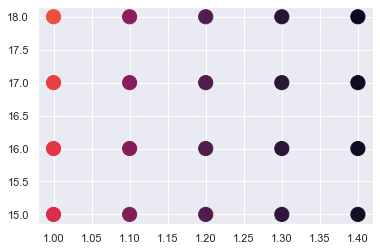

In [15]:
plt.scatter(df.Am, df.s, s=200, c=df.peak_T, vmin=1.8, vmax=2.5)  # , cmap='gray'

In [16]:
def varying_r_Ph_all_outputs(r, P_h):
    Am_array = np.arange(1, 1.5, 0.1)
    s_array = np.arange(15, 19, 1)
    
    peak_T_list = []
    SCC_forecasted_list = [] 
    forecasted_abatement_list = []
    forecasted_emissions_list = []
    T_complete_list = []
    
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h, return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
               columns =['Am', 's', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])
    return df

In [17]:
df_test = varying_r_Ph_all_outputs(r=20, P_h=30)

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:185: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


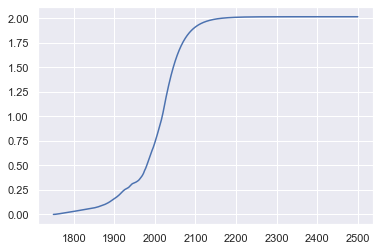

In [18]:
plt.plot(years, df_test['T_complete'][0])

In [19]:
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

df_dict = {}
keys = []
r_array = np.arange(20, 27, 3)
P_h_array = np.arange(40, 120, 20)
for i in range(len(r_array)):
    keys_const_r = []
    for j in range(len(P_h_array)):
        text = str(r_array[i]) + ',' + str(P_h_array[j])
        df_dict[text] = varying_r_Ph_all_outputs(r=r_array[i], P_h=P_h_array[j])
        keys_const_r.append(text)
    keys.append(keys_const_r)
    
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

NameError: name 'time' is not defined

In [ ]:
r_length = len(r_array)

P_h_length = len(P_h_array)

fig, axs = plt.subplots(P_h_length, r_length)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(r_length):
    print(i)
    key = keys[i]
    for j in range(P_h_length):
        ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='A$_{m}$', ylabel='s')
for ax in axs.flat:
    ax.label_outer()


In [ ]:
r_array

In [ ]:
# df_dict['20,40']

In [ ]:
for i in range(len(df_dict['20,40'])):
    label = "Am: " + str(round(df_dict['20,40']['Am'][i], 2)) + ", s: " + str(df_dict['20,40']['s'][i])
    plt.plot(years, df_dict['20,40']['T_complete'][i], label=label)

plt.xlabel('year')
plt.ylabel('T')
plt.legend(loc=2)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)

for i in range(r_length):
    key = keys[i]
    for j in range(P_h_length):
        for k in range(len(df_dict['20,40'])):
            ax = axs[j, i].plot(years, df_dict[key[j]]['T_complete'][k])
#             ax.set_xlim([2000, 2200])
#         ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='T')
    ax.set_ylim([0, 3])
for ax in axs.flat:
    ax.label_outer()



In [ ]:
keys

In [ ]:
for i in range(len(df_dict['20,40'])):
    label = "Am: " + str(round(df_dict['20,40']['Am'][i], 2)) + ", s: " + str(df_dict['20,40']['s'][i])
    plt.plot(years_forecasted, df_dict['20,40']['SCC_forecasted'][i], label=label)

plt.xlim(2000, 2100)
plt.ylim(0, 100)
plt.xlabel('year')
plt.ylabel('SCC')
plt.legend(loc=1)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)

for i in range(r_length):
    key = keys[i]
    for j in range(P_h_length):
        for k in range(len(df_dict['20,40'])):
            ax = axs[j, i].plot(years_forecasted, df_dict[key[j]]['SCC_forecasted'][k])
#             ax.set_xlim([2000, 2200])
#         ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='SCC')
    ax.set_xlim([2000, 2100])
    ax.set_ylim([0, 100])
for ax in axs.flat:
    ax.label_outer()


In [ ]:
def varying_D0_gamma_all_outputs(r, P_h):
    Am_array = np.arange(2, 1.5, 0.1)
    s_array = np.arange(15, 19, 1)
    
    peak_T_list = []
    SCC_forecasted_list = [] 
    forecasted_abatement_list = []
    forecasted_emissions_list = []
    T_complete_list = []
    
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h, return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
               columns =['Am', 's', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])
    return df

In [ ]:
D0_array = np.arange(2.5, 3, 0.1)*10**(-3)
gamma_array = np.arange(2, 2.3, 0.05)

In [ ]:
gamma_array

In [ ]:
peak_T_list = []
SCC_forecasted_list = [] 
forecasted_abatement_list = []
forecasted_emissions_list = []
T_complete_list = []

gamma_list = []
D0_list = []


for i in range(len(gamma_array)):
        for j in range(len(D0_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(gamma=gamma_array[i], D0=D0_array[j], return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            gamma_list.append(gamma_array[i])
            D0_list.append(D0_array[j])

df = pd.DataFrame(list(zip(gamma_list, D0_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
                  columns =['gamma', 'D0', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])

In [ ]:
df

In [ ]:
fig, axs = plt.subplots(1, 1)
ax = axs.scatter(df.gamma, df.D0, s=200, c=df.peak_T, vmin=1.8, vmax=2.2)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
fig.colorbar(ax, cax=cbar_ax)
axs.set_xlabel('$\gamma$')
axs.set_ylabel('D0')
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
for i in range(len(df)):
    plt.plot(years, df['T_complete'][i])

In [ ]:
for i in range(len(df)):
    if df['D0'][i] == 0.0025:
        plt.plot(years, df['T_complete'][i], label=df['gamma'][i])
        
plt.legend()

In [ ]:
for i in range(len(df)):
    if df['gamma'][i] == 2:
        plt.plot(years, df['T_complete'][i], label=df['D0'][i])

plt.legend()

In [ ]:
df

In [ ]:
def varying_r_Ph(r, P_h):
    peak_T_list = []
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T_list.append(peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h))
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list)),
               columns =['Am', 's', 'peak_T'])
    return df

In [ ]:
import time

In [ ]:
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

df_dict = {}
keys = []
r_array = np.arange(20, 27, 3)
P_h_array = np.arange(30, 100, 30)
for i in range(len(r_array)):
    keys_const_r = []
    for j in range(len(P_h_array)):
        text = str(r_array[i]) + ',' + str(P_h_array[j])
        df_dict[text] = varying_r_Ph(r=r_array[i], P_h=P_h_array[j])
        keys_const_r.append(text)
    keys.append(keys_const_r)
    
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

In [ ]:
r_length = len(r_array)

In [ ]:
P_h_length = len(P_h_array)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(r_length):
    print(i)
    key = keys[i]
    for j in range(P_h_length):
        ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='A$_{m}$', ylabel='s')
for ax in axs.flat:
    ax.label_outer()


5 min 20 s for 180 runs

In [ ]:
P_h_array

In [ ]:
df_dict['20,30']

gamma